In [1]:
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pymks
import pandas as pd
import os
from Scripts import velocityCalculations as vel
from Scripts import hoshenKopleman as hosh
import math
import time
from numpy import linalg as LA
from Scripts import plots


/home/sushil/anaconda3/envs/env_adi/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/sushil/anaconda3/envs/env_adi/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


--- 4.354748964309692 seconds ---


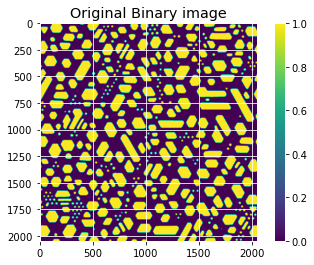

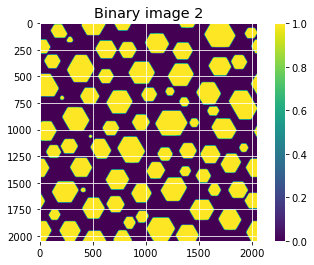

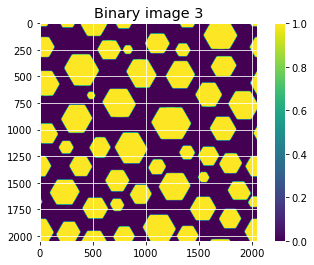

In [11]:
path = '/home/sushil/Desktop/adithya/HEXAGONAL/C04/'
list_of_files = os.listdir(path)
list_of_files.sort()
list_files = []
for i in list_of_files:
    if i[-5:]=='0.dat':
        list_files.append(path+i)
   
start_time = time.time()
img_ = corr.dat_to_numpy(list_files[30])
img_ = vel.gaussian_filter(img_,4)
img_ = (img_>0.5)*1
print("--- %s seconds ---" % (time.time() - start_time))
plt.imshow(img_)
plt.colorbar()
plt.title('Original Binary image')
plt.show()


img_1 = corr.dat_to_numpy(list_files[500])
img_1 = vel.gaussian_filter(img_1,4)
img_1 = (img_1>0.5)*1
plt.imshow(img_1)
plt.colorbar()
plt.title('Binary image 2')
plt.show()

img_2 = corr.dat_to_numpy(list_files[999])
img_2 = vel.gaussian_filter(img_2,4)
img_2 = (img_2>0.5)*1
plt.imshow(img_2)
plt.colorbar()
plt.title('Binary image 3')
plt.show()


In [13]:
list_files.reverse()

In [14]:
(list_files)

['/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_200000.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_199800.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_199600.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_199400.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_199200.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_199000.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_198800.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_198600.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_198400.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_198200.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_198000.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_197800.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_197600.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_197400.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_197200.dat',
 '/home/sushil/Desktop/adithya/HEXAGONAL/C04/time_19700

L1 6.691797733306885 secs
L2 1.3858721256256104 secs
L3 8.355955600738525 secs
16.433946132659912  seconds
total number of ppts : 45


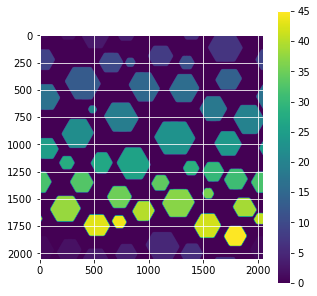

In [15]:
img_1 = corr.dat_to_numpy(list_files[1])
img_1 = vel.gaussian_filter(img_1,5)
img_1 = (img_1>0.5)*1
start= time.time()
labels = hosh.hoshenKoplemanLabels(img_1)
print(time.time()-start, ' seconds')
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(labels)
plt.colorbar()
print('total number of ppts :', np.max(labels))

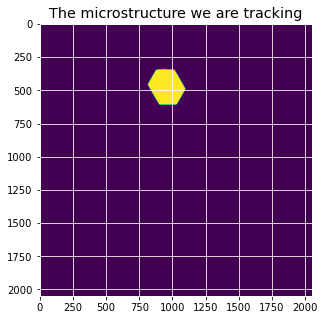

In [23]:
theChosenOne = 15
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(labels==theChosenOne)
plt.title('The microstructure we are tracking')
plt.show()

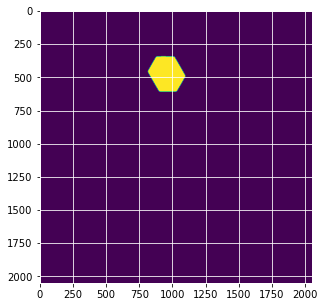

In [24]:
cog = hosh.precipitateCentres(labels,theChosenOne)
referenceShape = (labels==theChosenOne)*1
plt.imshow(referenceShape)

L1 6.716242790222168 secs
L2 1.4100384712219238 secs
L3 7.946025371551514 secs
15.0


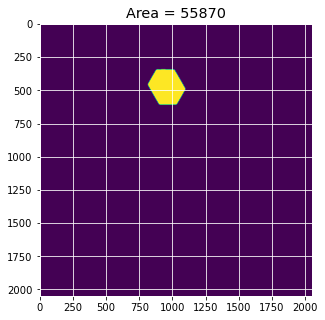

MicroStructure Number,  1
theta =  -29.167995394060977
l/b =  1.161028938768289
time for  0  =  22.288556575775146
----------------------------------------------------------------------------
L1 6.692732810974121 secs
L2 1.3912129402160645 secs
L3 7.93300199508667 secs
15.0


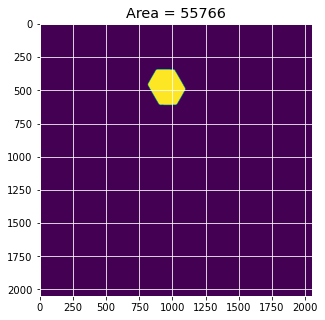

MicroStructure Number,  11
theta =  -28.92631667652236
l/b =  1.1629798850250692
time for  1  =  22.502909660339355
----------------------------------------------------------------------------
L1 6.5703184604644775 secs
L2 1.3871963024139404 secs
L3 7.9678285121917725 secs
15.0


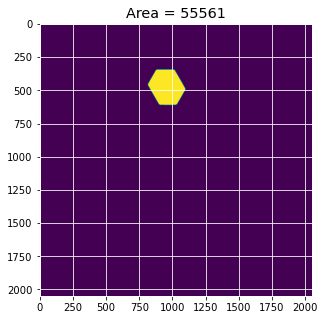

MicroStructure Number,  21
theta =  -29.08699067429566
l/b =  1.1624768569313069
time for  2  =  22.39573907852173
----------------------------------------------------------------------------
L1 6.717745065689087 secs
L2 1.3778040409088135 secs
L3 7.956472873687744 secs
15.0


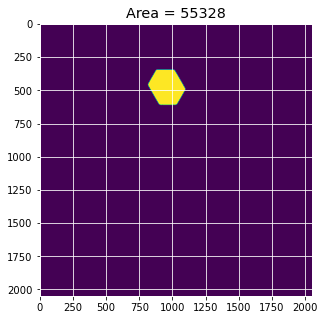

MicroStructure Number,  31
theta =  -29.425170942063527
l/b =  1.1618574243818183
time for  3  =  23.12779426574707
----------------------------------------------------------------------------
L1 6.680685758590698 secs
L2 1.382976770401001 secs
L3 7.982089281082153 secs
16.0


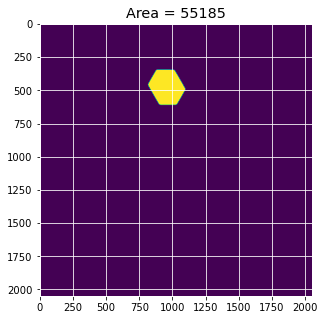

MicroStructure Number,  41
theta =  -29.38554767341207
l/b =  1.163638380937282
time for  4  =  22.390586137771606
----------------------------------------------------------------------------
L1 6.6100380420684814 secs
L2 1.3616645336151123 secs
L3 7.976213693618774 secs
16.0


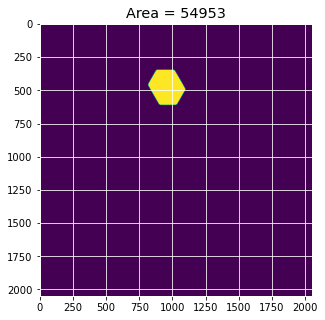

MicroStructure Number,  51
theta =  -29.579673667642602
l/b =  1.1630672214240645
time for  5  =  22.674418210983276
----------------------------------------------------------------------------
L1 6.747514963150024 secs
L2 1.4452381134033203 secs
L3 8.053498268127441 secs
16.0


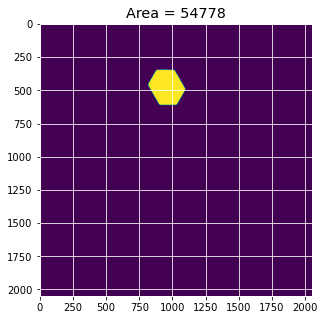

MicroStructure Number,  61
theta =  -29.75509512415539
l/b =  1.1641414209701586
time for  6  =  22.745357513427734
----------------------------------------------------------------------------
L1 6.729184627532959 secs
L2 1.3797709941864014 secs
L3 8.233300685882568 secs
16.0


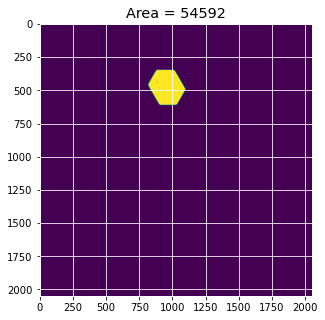

MicroStructure Number,  71
theta =  -29.883580411795656
l/b =  1.1642687061678618
time for  7  =  22.973894834518433
----------------------------------------------------------------------------
L1 6.553286075592041 secs
L2 1.3976061344146729 secs
L3 8.006739616394043 secs
16.0


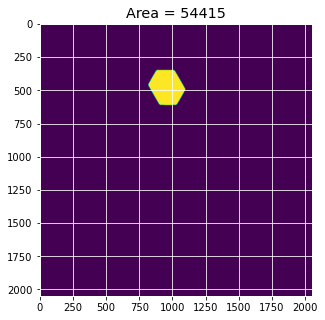

MicroStructure Number,  81
theta =  -29.899952352328565
l/b =  1.1656930730000952
time for  8  =  22.723488569259644
----------------------------------------------------------------------------
L1 6.7060627937316895 secs
L2 1.4157297611236572 secs
L3 8.189464569091797 secs
16.0


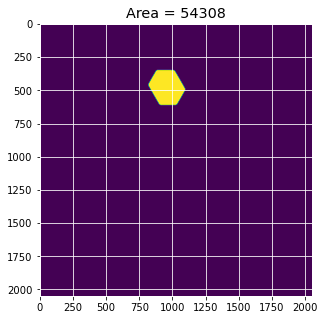

MicroStructure Number,  91
theta =  -29.577498297755266
l/b =  1.1686281002980154
time for  9  =  23.00343370437622
----------------------------------------------------------------------------
L1 6.689005374908447 secs
L2 1.3694090843200684 secs
L3 8.257479429244995 secs
16.0


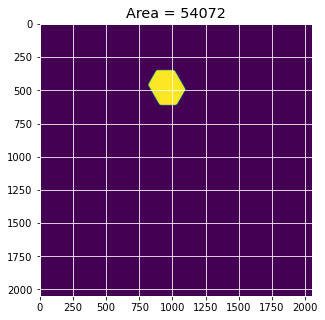

MicroStructure Number,  101
theta =  -29.912543094277915
l/b =  1.1683692968841035
time for  10  =  23.048192977905273
----------------------------------------------------------------------------
L1 6.669509410858154 secs
L2 1.3689289093017578 secs
L3 8.06088399887085 secs
16.0


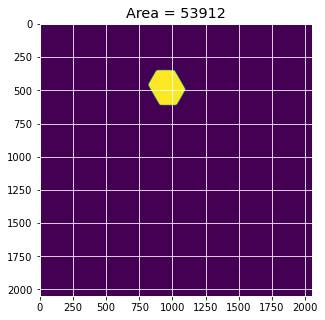

MicroStructure Number,  111
theta =  -29.81797260598849
l/b =  1.1708379447471686
time for  11  =  22.846402883529663
----------------------------------------------------------------------------
L1 6.6627867221832275 secs
L2 1.3837478160858154 secs
L3 8.082644701004028 secs
16.0


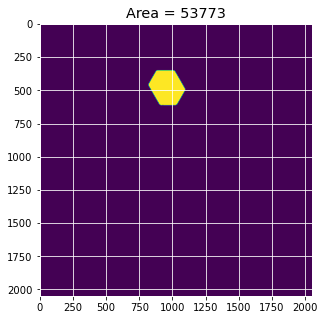

MicroStructure Number,  121
theta =  -29.65643746551206
l/b =  1.173290417962475
time for  12  =  23.008660554885864
----------------------------------------------------------------------------
L1 6.593505144119263 secs
L2 1.391571283340454 secs
L3 8.007706642150879 secs
16.0


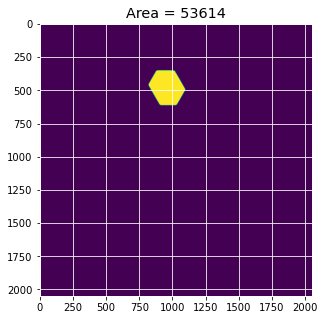

MicroStructure Number,  131
theta =  -29.483592438596695
l/b =  1.1763465092177685
time for  13  =  23.20794415473938
----------------------------------------------------------------------------
L1 6.646324396133423 secs
L2 1.3699979782104492 secs
L3 8.006849765777588 secs
16.0


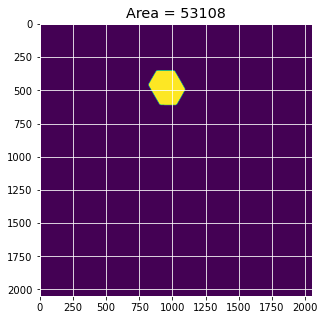

MicroStructure Number,  141
theta =  -29.96140738819279
l/b =  1.170273099665167
time for  14  =  23.061283111572266
----------------------------------------------------------------------------
L1 6.678850889205933 secs
L2 1.397454023361206 secs
L3 7.934113502502441 secs
16.0


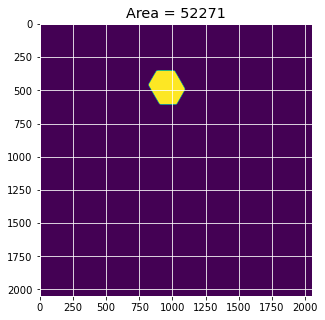

MicroStructure Number,  151
theta =  -31.10304901457372
l/b =  1.1564205586320002
time for  15  =  22.971407651901245
----------------------------------------------------------------------------
L1 6.519290924072266 secs
L2 1.367823839187622 secs
L3 7.850036859512329 secs
16.0


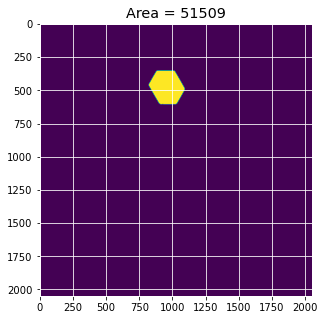

MicroStructure Number,  161
theta =  -31.749979709198
l/b =  1.1469912811191236
time for  16  =  22.71162724494934
----------------------------------------------------------------------------
L1 6.770526647567749 secs
L2 1.380178451538086 secs
L3 8.059177160263062 secs
17.0


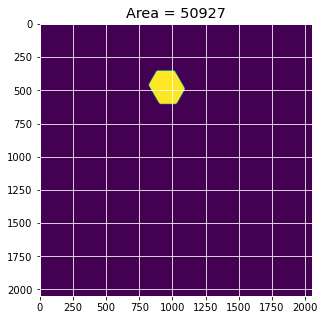

MicroStructure Number,  171
theta =  -31.889423160044796
l/b =  1.1402596134585559
time for  17  =  23.57607650756836
----------------------------------------------------------------------------
L1 6.563435316085815 secs
L2 1.3831684589385986 secs
L3 7.850541353225708 secs
17.0


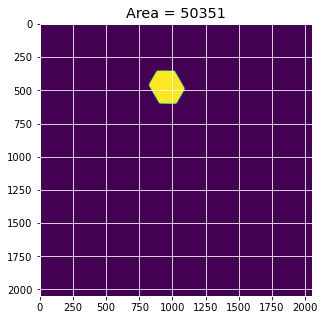

MicroStructure Number,  181
theta =  -32.52412382988177
l/b =  1.1352583135173622
time for  18  =  22.69576144218445
----------------------------------------------------------------------------
L1 6.5329790115356445 secs
L2 1.3962736129760742 secs
L3 7.948813199996948 secs
17.0


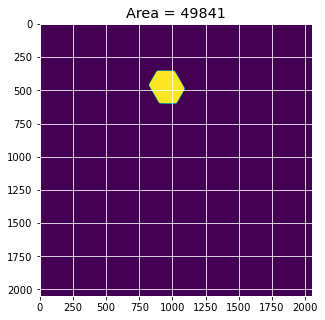

MicroStructure Number,  191
theta =  -33.45248736358695
l/b =  1.1309866101868198
time for  19  =  22.908886432647705
----------------------------------------------------------------------------
L1 6.63089919090271 secs
L2 1.3343555927276611 secs
L3 7.867337465286255 secs
17.0


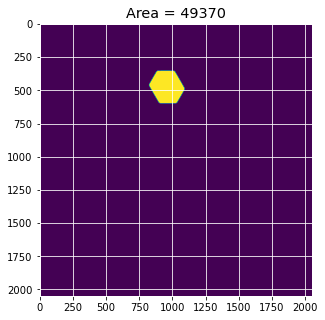

MicroStructure Number,  201
theta =  -34.55993461941209
l/b =  1.127962021237144
time for  20  =  22.760683059692383
----------------------------------------------------------------------------
L1 6.693377733230591 secs
L2 1.39776611328125 secs
L3 8.012032747268677 secs
17.0


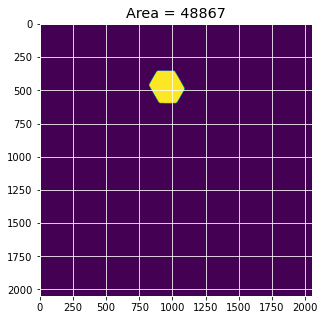

MicroStructure Number,  211
theta =  -35.47636527806
l/b =  1.1236889137086878
time for  21  =  23.65980076789856
----------------------------------------------------------------------------
L1 6.450652599334717 secs
L2 1.3510408401489258 secs
L3 7.951826333999634 secs
17.0


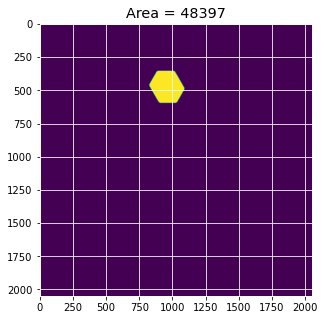

MicroStructure Number,  221
theta =  -35.92348532760083
l/b =  1.1180355942765654
time for  22  =  22.827167510986328
----------------------------------------------------------------------------
L1 6.621780633926392 secs
L2 1.3684802055358887 secs
L3 8.081084728240967 secs
17.0


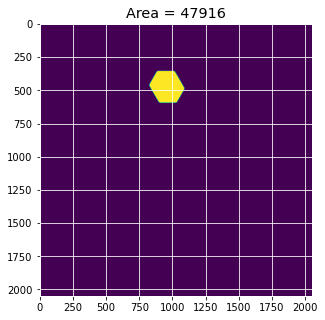

MicroStructure Number,  231
theta =  -36.6789289809965
l/b =  1.112048546782047
time for  23  =  23.053816080093384
----------------------------------------------------------------------------
L1 6.661242246627808 secs
L2 1.3632633686065674 secs
L3 7.968125581741333 secs
17.0


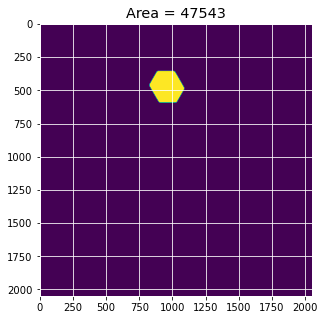

MicroStructure Number,  241
theta =  -36.532418078315885
l/b =  1.1071034809210198
time for  24  =  22.95630955696106
----------------------------------------------------------------------------
L1 6.683393955230713 secs
L2 1.3608758449554443 secs
L3 8.05917763710022 secs
17.0


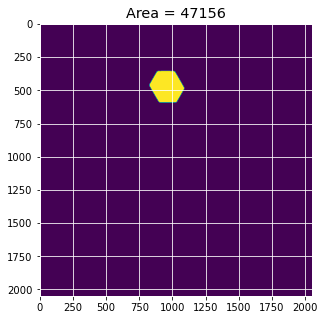

MicroStructure Number,  251
theta =  -36.91895171404958
l/b =  1.1020021900527226
time for  25  =  22.901381731033325
----------------------------------------------------------------------------
L1 6.610184192657471 secs
L2 1.3588922023773193 secs
L3 8.087651014328003 secs
17.0


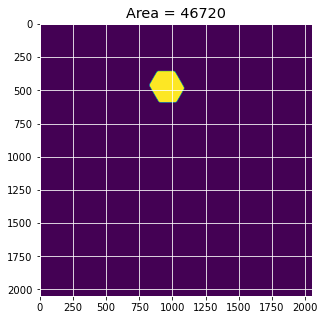

MicroStructure Number,  261
theta =  -37.55568369826839
l/b =  1.0961534735595573
time for  26  =  23.48578667640686
----------------------------------------------------------------------------
L1 6.719743967056274 secs
L2 1.361459493637085 secs
L3 8.146589279174805 secs
17.0


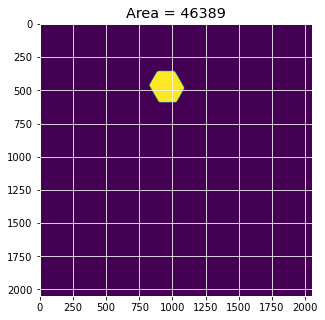

MicroStructure Number,  271
theta =  -37.698528637729325
l/b =  1.091636887691617
time for  27  =  23.09960126876831
----------------------------------------------------------------------------
L1 6.54849648475647 secs
L2 1.3550455570220947 secs
L3 8.180231809616089 secs
17.0


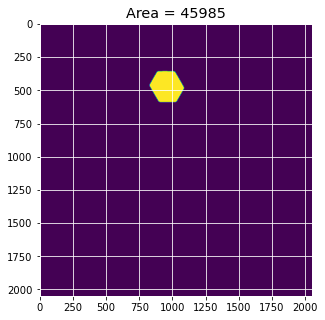

MicroStructure Number,  281
theta =  -38.67777724775259
l/b =  1.0866503761745534
time for  28  =  23.254188060760498
----------------------------------------------------------------------------
L1 6.566173315048218 secs
L2 1.3764395713806152 secs
L3 8.21232795715332 secs
17.0


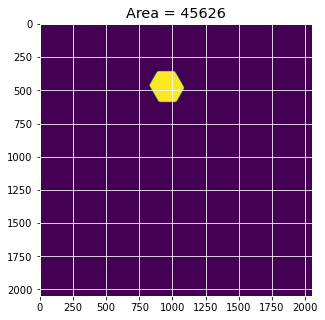

MicroStructure Number,  291
theta =  -39.37593548635513
l/b =  1.0817386507486793
time for  29  =  23.211188554763794
----------------------------------------------------------------------------
L1 6.615715503692627 secs
L2 1.4713408946990967 secs
L3 8.233176946640015 secs
17.0


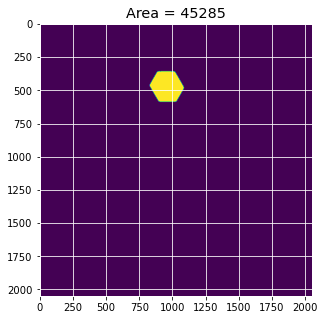

MicroStructure Number,  301
theta =  -40.025267747925156
l/b =  1.0772000550342369
time for  30  =  23.14604902267456
----------------------------------------------------------------------------
L1 6.70593523979187 secs
L2 1.38675856590271 secs
L3 7.9644646644592285 secs
17.0


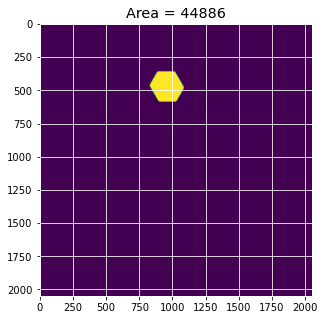

MicroStructure Number,  311
theta =  -41.627505172305426
l/b =  1.072305456659586
time for  31  =  24.577796936035156
----------------------------------------------------------------------------
L1 6.735662221908569 secs
L2 1.385338306427002 secs
L3 8.01982069015503 secs
17.0


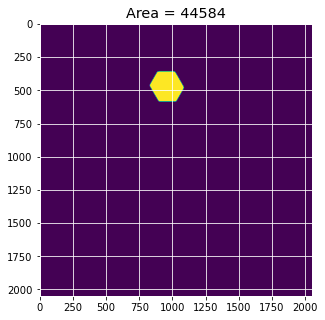

MicroStructure Number,  321
theta =  -42.22596906720717
l/b =  1.0685023858317748
time for  32  =  23.02094030380249
----------------------------------------------------------------------------
L1 6.584561824798584 secs
L2 1.4419441223144531 secs
L3 8.228214502334595 secs
17.0


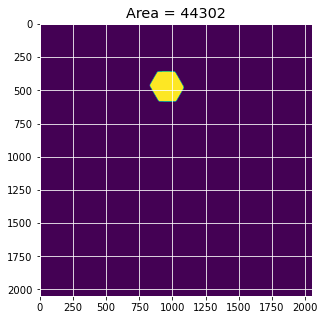

MicroStructure Number,  331
theta =  -42.322532956210864
l/b =  1.0649381609478803
time for  33  =  23.370243787765503
----------------------------------------------------------------------------
L1 6.711940288543701 secs
L2 1.405790090560913 secs
L3 8.240252494812012 secs
17.0


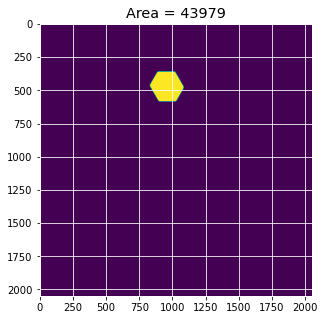

MicroStructure Number,  341
theta =  -43.555374034176566
l/b =  1.060708722164622
time for  34  =  23.365747928619385
----------------------------------------------------------------------------
L1 6.7025532722473145 secs
L2 1.519103765487671 secs
L3 8.471116065979004 secs
17.0


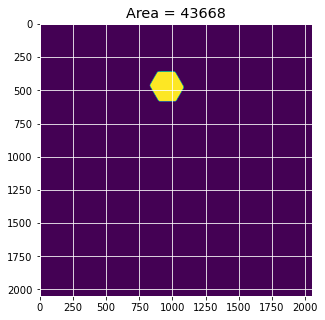

MicroStructure Number,  351
theta =  -44.77561638926157
l/b =  1.0568082650579251
time for  35  =  23.905243158340454
----------------------------------------------------------------------------
L1 6.48629903793335 secs
L2 1.347449779510498 secs
L3 8.3017578125 secs
17.0


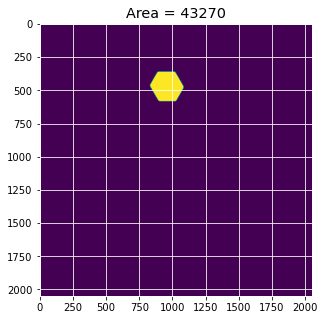

MicroStructure Number,  361
theta =  42.517546000484174
l/b =  1.0534046246510325
time for  36  =  22.924031972885132
----------------------------------------------------------------------------
L1 6.7179811000823975 secs
L2 1.350172519683838 secs
L3 8.093091487884521 secs
18.0


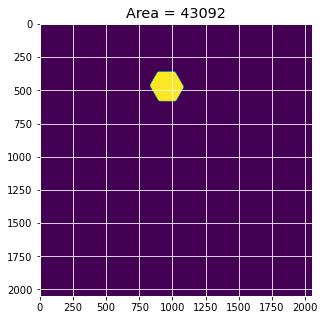

MicroStructure Number,  371
theta =  43.135230717922354
l/b =  1.049951113716522
time for  37  =  22.895256519317627
----------------------------------------------------------------------------
L1 6.594764947891235 secs
L2 1.4615414142608643 secs
L3 7.929959535598755 secs
18.0


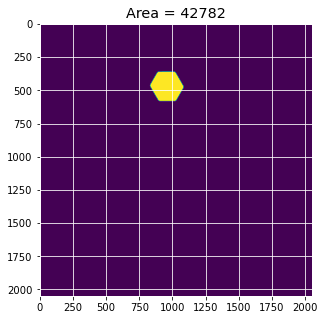

MicroStructure Number,  381
theta =  40.84090545710643
l/b =  1.04606263393661
time for  38  =  22.95597243309021
----------------------------------------------------------------------------
L1 6.56086802482605 secs
L2 1.4010467529296875 secs
L3 8.044213771820068 secs
18.0


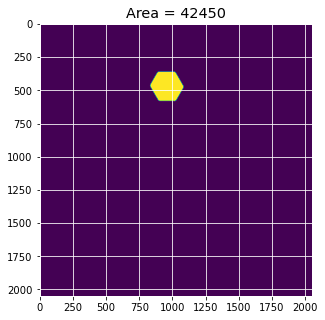

MicroStructure Number,  391
theta =  37.5364300688336
l/b =  1.0433603619108855
time for  39  =  23.42563557624817
----------------------------------------------------------------------------
L1 6.522214651107788 secs
L2 1.5470662117004395 secs
L3 8.36695909500122 secs
18.0


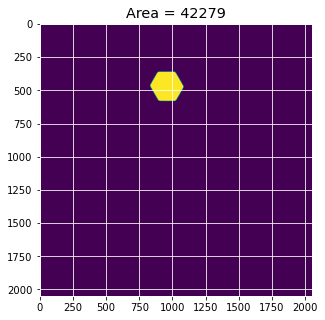

MicroStructure Number,  401
theta =  37.80761609332758
l/b =  1.039153455073021
time for  40  =  23.418761730194092
----------------------------------------------------------------------------
L1 6.7318809032440186 secs
L2 1.3839805126190186 secs
L3 8.02382206916809 secs
18.0


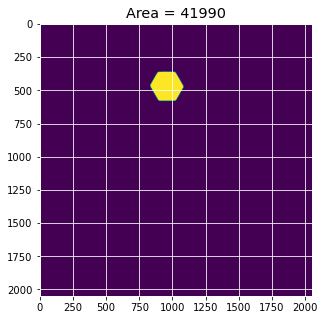

MicroStructure Number,  411
theta =  33.74638077724082
l/b =  1.035784604692114
time for  41  =  23.594318866729736
----------------------------------------------------------------------------
L1 6.59285569190979 secs
L2 1.3693952560424805 secs
L3 7.946744680404663 secs
18.0


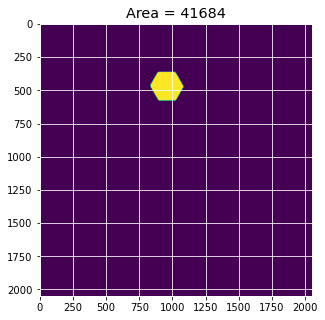

MicroStructure Number,  421
theta =  28.402193168792525
l/b =  1.0346718754281021
time for  42  =  23.378790855407715
----------------------------------------------------------------------------
L1 6.6520469188690186 secs
L2 1.402400016784668 secs
L3 8.031758308410645 secs
17.0


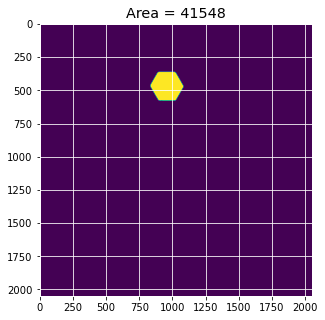

MicroStructure Number,  431
theta =  27.005774946754
l/b =  1.03055654525832
time for  43  =  24.030804872512817
----------------------------------------------------------------------------
L1 6.66832423210144 secs
L2 1.4048066139221191 secs
L3 8.051069736480713 secs
17.0


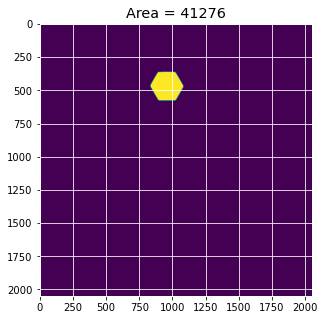

MicroStructure Number,  441
theta =  20.73784462889794
l/b =  1.0292316337235283
time for  44  =  23.07876968383789
----------------------------------------------------------------------------
L1 6.608379602432251 secs
L2 1.3617641925811768 secs
L3 7.945995330810547 secs
17.0


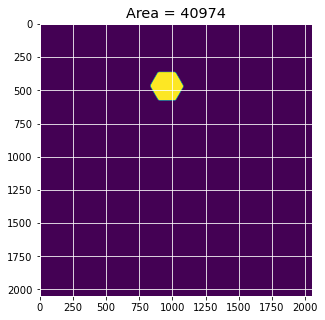

MicroStructure Number,  451
theta =  13.96638242268395
l/b =  1.0316967325480535
time for  45  =  22.89291763305664
----------------------------------------------------------------------------
L1 6.5727996826171875 secs
L2 1.3562817573547363 secs
L3 8.044158935546875 secs
17.0


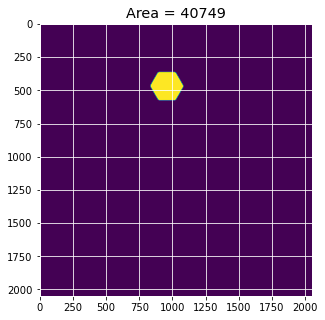

MicroStructure Number,  461
theta =  8.644980085048457
l/b =  1.0328156615252932
time for  46  =  22.795960903167725
----------------------------------------------------------------------------
L1 6.611538410186768 secs
L2 1.382610559463501 secs
L3 7.966480016708374 secs
17.0


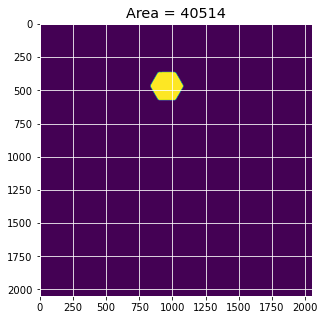

MicroStructure Number,  471
theta =  4.151175749464118
l/b =  1.035748022290428
time for  47  =  23.14863657951355
----------------------------------------------------------------------------
L1 6.599946022033691 secs
L2 1.3880763053894043 secs
L3 8.051471471786499 secs
18.0


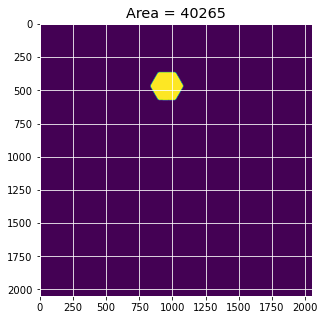

MicroStructure Number,  481
theta =  0.2645580048129184
l/b =  1.0395605777511896
time for  48  =  22.849000453948975
----------------------------------------------------------------------------
L1 6.656244516372681 secs
L2 1.3841073513031006 secs
L3 8.068225383758545 secs
18.0


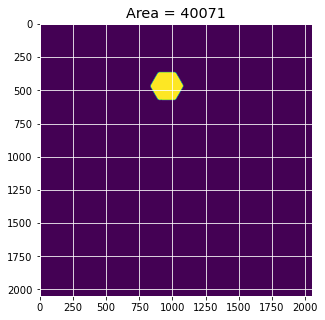

MicroStructure Number,  491
theta =  -2.9702955534070874
l/b =  1.0425496949433797
time for  49  =  22.993399620056152
----------------------------------------------------------------------------
L1 6.668258190155029 secs
L2 1.3875348567962646 secs
L3 7.995626926422119 secs
18.0


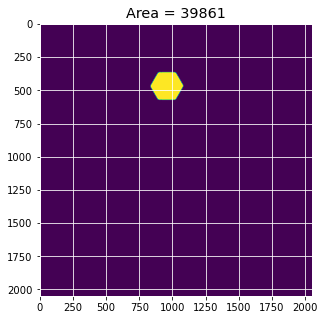

MicroStructure Number,  501
theta =  -5.485059291796863
l/b =  1.0471598121542942
time for  50  =  22.737333297729492
----------------------------------------------------------------------------
L1 6.615527391433716 secs
L2 1.366095781326294 secs
L3 8.13555908203125 secs
19.0


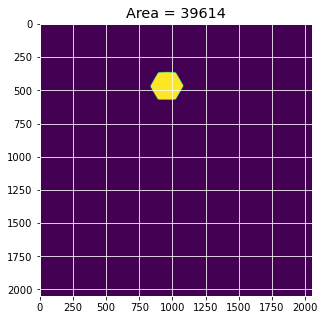

MicroStructure Number,  511
theta =  -6.952309897966341
l/b =  1.0543479319323492
time for  51  =  22.791515588760376
----------------------------------------------------------------------------
L1 6.58993124961853 secs
L2 1.363555908203125 secs
L3 8.006922960281372 secs
18.0


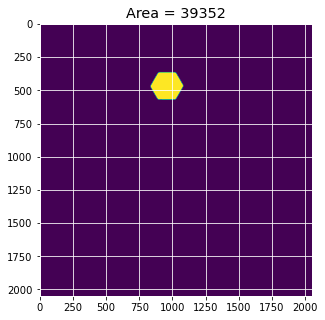

MicroStructure Number,  521
theta =  -7.2406624653410265
l/b =  1.0630473228376671
time for  52  =  22.750751733779907
----------------------------------------------------------------------------
L1 6.664059638977051 secs
L2 1.3492748737335205 secs
L3 8.003384590148926 secs
18.0


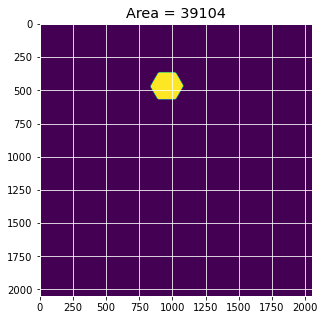

MicroStructure Number,  531
theta =  -6.8943821723434695
l/b =  1.0724286220986825
time for  53  =  22.67889904975891
----------------------------------------------------------------------------
L1 6.596835374832153 secs
L2 1.3876209259033203 secs
L3 8.020938873291016 secs
18.0


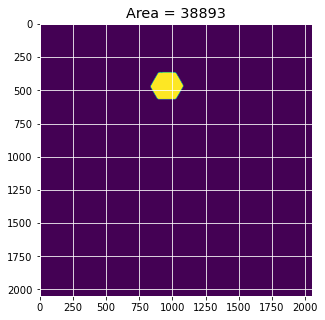

MicroStructure Number,  541
theta =  -7.208475524661719
l/b =  1.0801977171400694
time for  54  =  22.55449342727661
----------------------------------------------------------------------------
L1 6.612675189971924 secs
L2 1.3665096759796143 secs
L3 7.9438316822052 secs
18.0


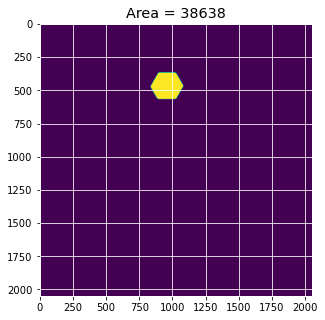

MicroStructure Number,  551
theta =  -7.520371954931411
l/b =  1.0896855602725377
time for  55  =  22.723952054977417
----------------------------------------------------------------------------
L1 6.576591491699219 secs
L2 1.3754785060882568 secs
L3 8.016706466674805 secs
18.0


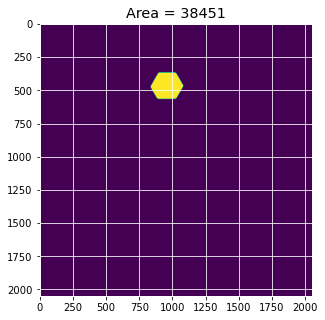

MicroStructure Number,  561
theta =  -8.436284310537385
l/b =  1.0960668325469909
time for  56  =  22.605137825012207
----------------------------------------------------------------------------
L1 6.7651026248931885 secs
L2 1.4105463027954102 secs
L3 8.029831647872925 secs
18.0


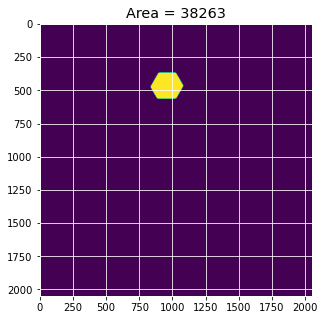

MicroStructure Number,  571
theta =  -9.426840273385025
l/b =  1.1036260814147039
time for  57  =  23.29024314880371
----------------------------------------------------------------------------
L1 6.570486783981323 secs
L2 1.3700752258300781 secs
L3 7.967318058013916 secs
18.0


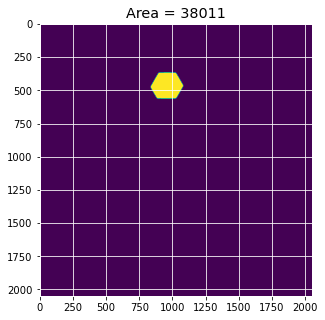

MicroStructure Number,  581
theta =  -10.222875874628214
l/b =  1.1133770805927894
time for  58  =  22.39378547668457
----------------------------------------------------------------------------
L1 6.488113641738892 secs
L2 1.3399755954742432 secs
L3 7.968284368515015 secs
18.0


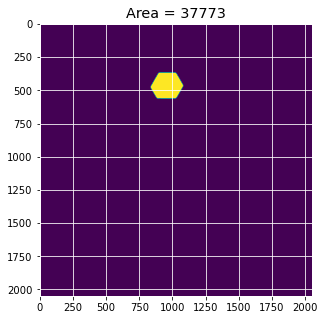

MicroStructure Number,  591
theta =  -11.002186589443008
l/b =  1.1240575699229785
time for  59  =  22.666111946105957
----------------------------------------------------------------------------
L1 6.450744390487671 secs
L2 1.3461534976959229 secs
L3 7.948012113571167 secs
18.0


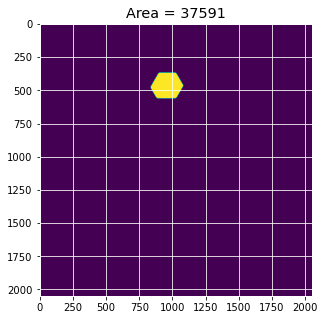

MicroStructure Number,  601
theta =  -11.966847073853623
l/b =  1.1331547533506219
time for  60  =  22.52154850959778
----------------------------------------------------------------------------
L1 6.619581460952759 secs
L2 1.3693830966949463 secs
L3 8.021621227264404 secs
19.0


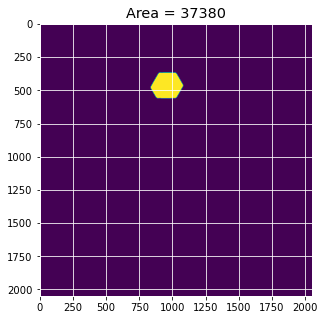

MicroStructure Number,  611
theta =  -12.813610469024598
l/b =  1.144408813196388
time for  61  =  23.010551691055298
----------------------------------------------------------------------------
L1 6.5854432582855225 secs
L2 1.3550748825073242 secs
L3 8.018892288208008 secs
19.0


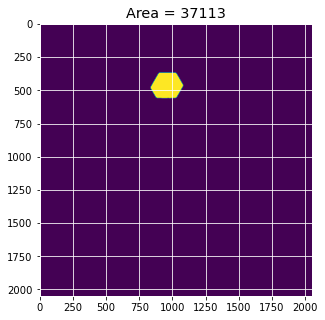

MicroStructure Number,  621
theta =  -13.314446824399207
l/b =  1.1591009668349124
time for  62  =  22.684052228927612
----------------------------------------------------------------------------
L1 6.698579788208008 secs
L2 1.3609707355499268 secs
L3 8.028486013412476 secs
20.0


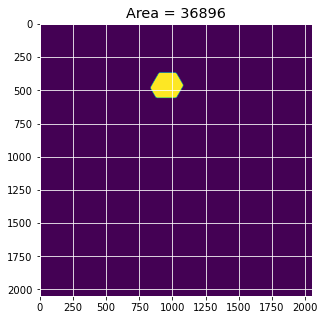

MicroStructure Number,  631
theta =  -14.035855907174538
l/b =  1.1724994239297055
time for  63  =  22.802029848098755
----------------------------------------------------------------------------
L1 6.732311487197876 secs
L2 1.3761568069458008 secs
L3 7.99460244178772 secs
20.0


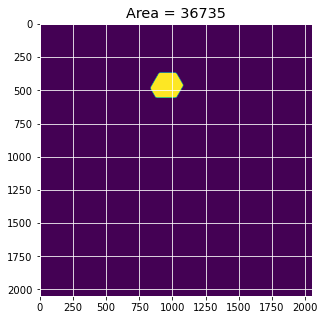

MicroStructure Number,  641
theta =  -15.07346997818017
l/b =  1.185271911417982
time for  64  =  22.62797522544861
----------------------------------------------------------------------------
L1 6.801381349563599 secs
L2 1.3884203433990479 secs
L3 8.26773476600647 secs
20.0


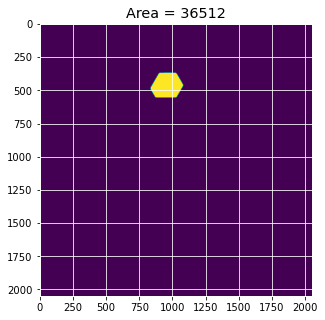

MicroStructure Number,  651
theta =  -15.831135268692352
l/b =  1.2016501572296827
time for  65  =  23.35423755645752
----------------------------------------------------------------------------
L1 6.643315076828003 secs
L2 1.386756420135498 secs
L3 8.877817392349243 secs
20.0


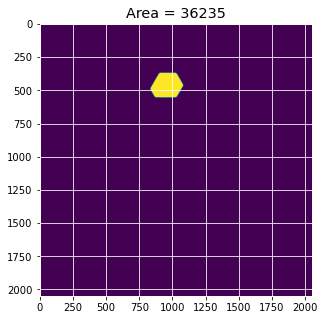

MicroStructure Number,  661
theta =  -16.483057154240157
l/b =  1.2227436176037205
time for  66  =  23.404568433761597
----------------------------------------------------------------------------
L1 6.672838449478149 secs
L2 1.3785114288330078 secs
L3 8.029256343841553 secs
20.0


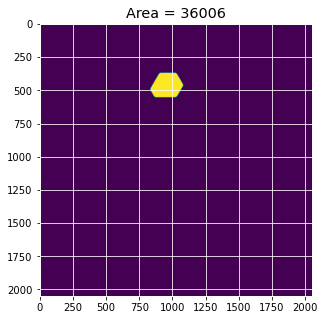

MicroStructure Number,  671
theta =  -17.33069574533134
l/b =  1.2445223373695502
time for  67  =  22.85938811302185
----------------------------------------------------------------------------
L1 6.617830514907837 secs
L2 1.3664369583129883 secs
L3 7.9291112422943115 secs
21.0


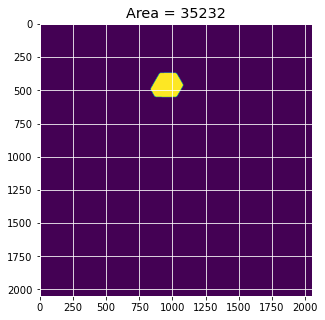

MicroStructure Number,  681
theta =  -16.853808886580413
l/b =  1.2372563463008077
time for  68  =  22.49966073036194
----------------------------------------------------------------------------
L1 6.691065311431885 secs
L2 1.3682971000671387 secs
L3 7.981840372085571 secs
21.0


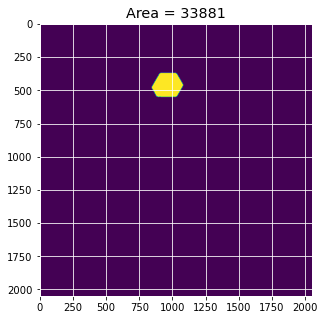

MicroStructure Number,  691
theta =  -13.05217918718514
l/b =  1.1852884534450154
time for  69  =  22.949339866638184
----------------------------------------------------------------------------
L1 6.667088747024536 secs
L2 1.3424005508422852 secs
L3 7.957451581954956 secs
21.0


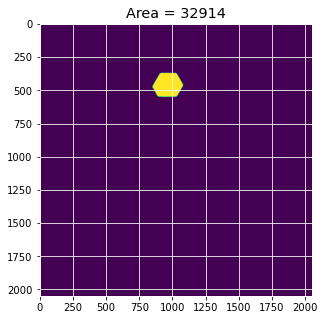

MicroStructure Number,  701
theta =  -10.681095388049037
l/b =  1.1568748790747576
time for  70  =  22.742024421691895
----------------------------------------------------------------------------
L1 6.648990631103516 secs
L2 1.366607904434204 secs
L3 8.060719966888428 secs
22.0


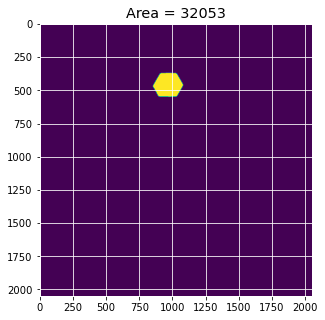

MicroStructure Number,  711
theta =  -8.342849992872912
l/b =  1.1382860854745052
time for  71  =  22.837613582611084
----------------------------------------------------------------------------
L1 6.64763331413269 secs
L2 1.369441032409668 secs
L3 7.956854820251465 secs
22.0


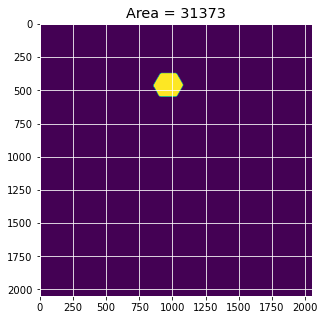

MicroStructure Number,  721
theta =  -5.634951800683889
l/b =  1.1206635689881157
time for  72  =  22.887335300445557
----------------------------------------------------------------------------
L1 6.654865741729736 secs
L2 1.3597872257232666 secs
L3 8.03322982788086 secs
22.0


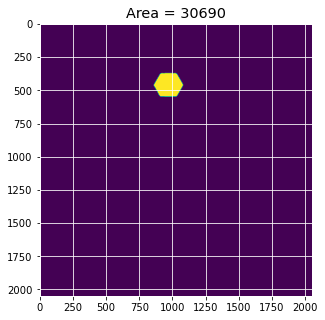

MicroStructure Number,  731
theta =  -2.236275517566098
l/b =  1.1050797463141506
time for  73  =  23.30351734161377
----------------------------------------------------------------------------
L1 6.631720781326294 secs
L2 1.3748550415039062 secs
L3 7.973962068557739 secs
25.0


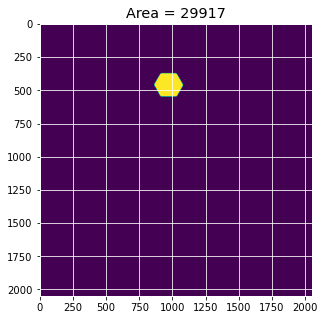

MicroStructure Number,  741
theta =  2.7306909826362777
l/b =  1.0949231647895419
time for  74  =  22.78937554359436
----------------------------------------------------------------------------
L1 6.986589431762695 secs
L2 1.3959999084472656 secs
L3 7.983094692230225 secs
26.0


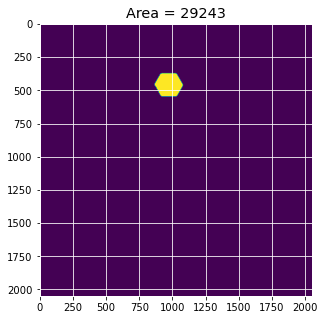

MicroStructure Number,  751
theta =  8.336368321860483
l/b =  1.0884040429090311
time for  75  =  23.54702615737915
----------------------------------------------------------------------------
L1 6.636821985244751 secs
L2 1.3952243328094482 secs
L3 8.082998752593994 secs
27.0


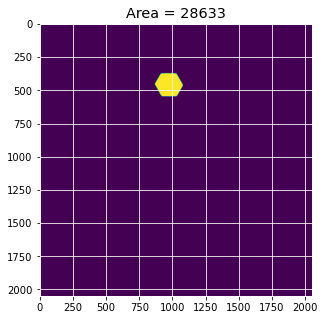

MicroStructure Number,  761
theta =  13.762366416779024
l/b =  1.086027001449413
time for  76  =  23.0967276096344
----------------------------------------------------------------------------
L1 6.710046052932739 secs
L2 1.6089935302734375 secs
L3 8.141885042190552 secs
29.0


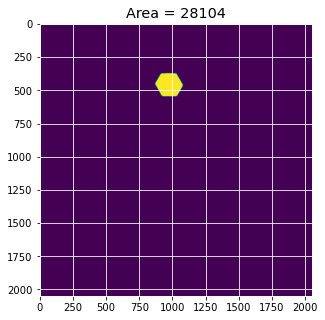

MicroStructure Number,  771
theta =  19.815933561774646
l/b =  1.0847900245624265
time for  77  =  23.363884449005127
----------------------------------------------------------------------------
L1 6.563209056854248 secs
L2 1.3865430355072021 secs
L3 8.05437445640564 secs
29.0


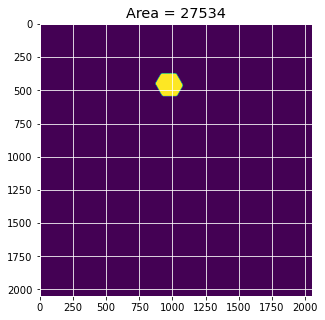

MicroStructure Number,  781
theta =  23.68836305126176
l/b =  1.0920564185131487
time for  78  =  22.652379274368286
----------------------------------------------------------------------------
L1 6.518058776855469 secs
L2 1.3655004501342773 secs
L3 8.049686431884766 secs
29.0


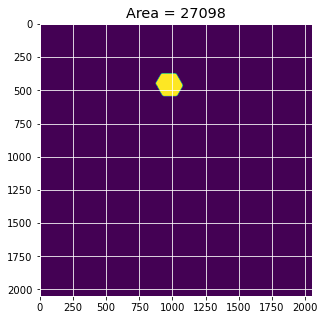

MicroStructure Number,  791
theta =  29.26643692311008
l/b =  1.0946429732428502
time for  79  =  22.782763242721558
----------------------------------------------------------------------------
L1 6.491008996963501 secs
L2 1.3243746757507324 secs
L3 7.992557525634766 secs
29.0


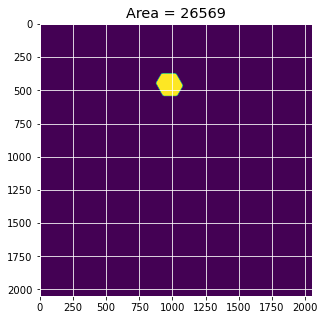

MicroStructure Number,  801
theta =  32.75212251923616
l/b =  1.1044147010025736
time for  80  =  22.91837477684021
----------------------------------------------------------------------------
L1 6.5359954833984375 secs
L2 1.3966093063354492 secs
L3 7.9510064125061035 secs
29.0


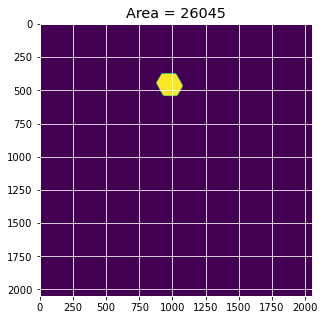

MicroStructure Number,  811
theta =  35.110530443722375
l/b =  1.1170884336753093
time for  81  =  22.477928161621094
----------------------------------------------------------------------------
L1 6.637259483337402 secs
L2 1.363152265548706 secs
L3 8.062456846237183 secs
30.0


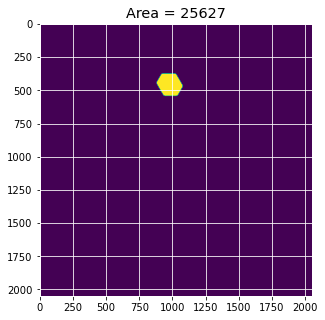

MicroStructure Number,  821
theta =  37.35822878548862
l/b =  1.1378748335882836
time for  82  =  22.905587434768677
----------------------------------------------------------------------------
L1 6.63811469078064 secs
L2 1.357409954071045 secs
L3 7.998734474182129 secs
30.0


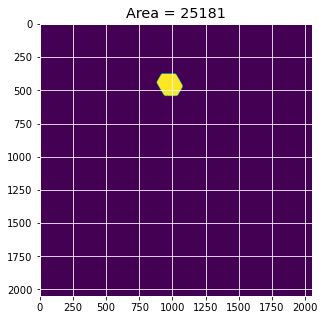

MicroStructure Number,  831
theta =  39.10764970559582
l/b =  1.1669827644406376
time for  83  =  22.776428699493408
----------------------------------------------------------------------------
L1 6.647429943084717 secs
L2 1.3641397953033447 secs
L3 7.9511189460754395 secs
31.0


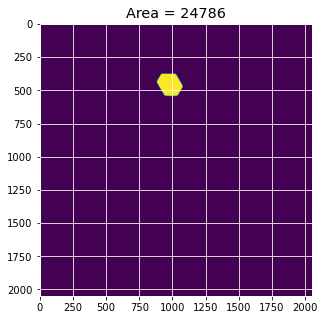

MicroStructure Number,  841
theta =  40.252250628309255
l/b =  1.1986237594507876
time for  84  =  22.520938873291016
----------------------------------------------------------------------------
L1 6.570778846740723 secs
L2 1.3838000297546387 secs
L3 7.892011642456055 secs
32.0


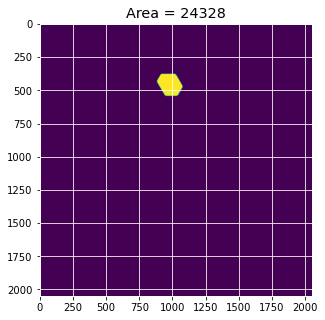

MicroStructure Number,  851
theta =  41.38298890591886
l/b =  1.2334838946329907
time for  85  =  22.623366355895996
----------------------------------------------------------------------------
L1 6.591882228851318 secs
L2 1.3399989604949951 secs
L3 8.009045600891113 secs
32.0


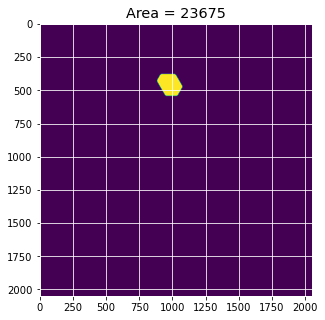

MicroStructure Number,  861
theta =  43.1193777150528
l/b =  1.268868619531439
time for  86  =  22.511425971984863
----------------------------------------------------------------------------
L1 6.6082398891448975 secs
L2 1.3777399063110352 secs
L3 8.003323554992676 secs
34.0


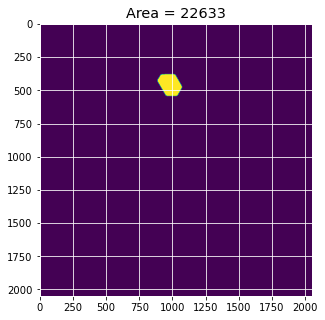

MicroStructure Number,  871
theta =  -43.0342126719229
l/b =  1.3006290124126594
time for  87  =  22.78742241859436
----------------------------------------------------------------------------
L1 6.622577428817749 secs
L2 1.4061150550842285 secs
L3 7.948948383331299 secs
36.0


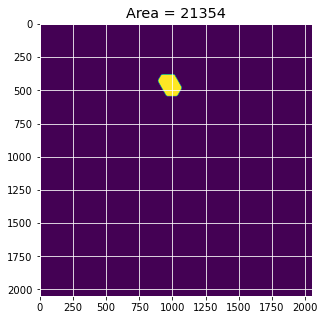

MicroStructure Number,  881
theta =  -39.32943613572172
l/b =  1.3547061019526063
time for  88  =  22.62598419189453
----------------------------------------------------------------------------
L1 6.62158465385437 secs
L2 1.3851232528686523 secs
L3 8.017448425292969 secs
38.0


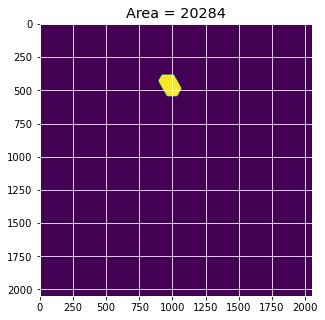

MicroStructure Number,  891
theta =  -36.80046530692342
l/b =  1.4198442050499533
time for  89  =  22.56916880607605
----------------------------------------------------------------------------
L1 6.6098408699035645 secs
L2 1.3685293197631836 secs
L3 7.95236611366272 secs
40.0


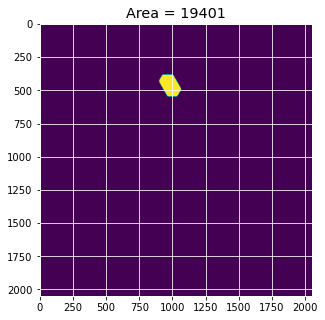

MicroStructure Number,  901
theta =  -34.091267966622254
l/b =  1.498902703463815
time for  90  =  22.351483583450317
----------------------------------------------------------------------------
L1 6.614800214767456 secs
L2 1.3838989734649658 secs
L3 7.892065525054932 secs
41.0


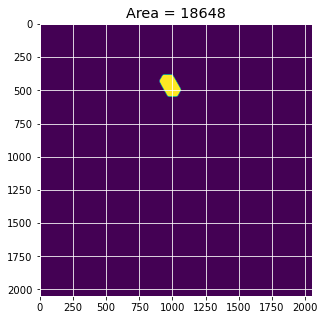

MicroStructure Number,  911
theta =  -32.688497640608325
l/b =  1.570298774609453
time for  91  =  22.433234214782715
----------------------------------------------------------------------------
L1 6.474283933639526 secs
L2 1.3583102226257324 secs
L3 7.98974084854126 secs
46.0


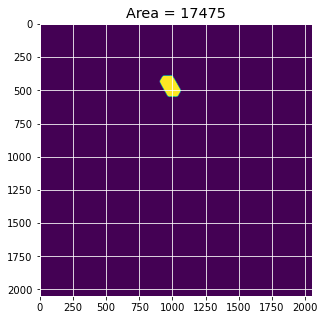

MicroStructure Number,  921
theta =  -34.46337546379417
l/b =  1.5946216928378596
time for  92  =  22.40107226371765
----------------------------------------------------------------------------
L1 6.57771635055542 secs
L2 1.3891732692718506 secs
L3 8.060781240463257 secs
47.0


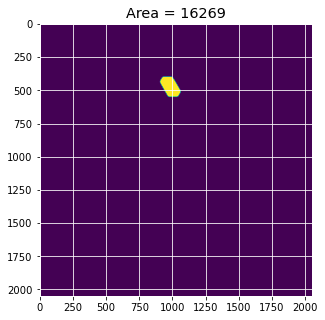

MicroStructure Number,  931
theta =  -36.90590720829117
l/b =  1.6496322685209839
time for  93  =  22.64679980278015
----------------------------------------------------------------------------
L1 6.581160068511963 secs
L2 1.37449312210083 secs
L3 7.87444281578064 secs
51.0


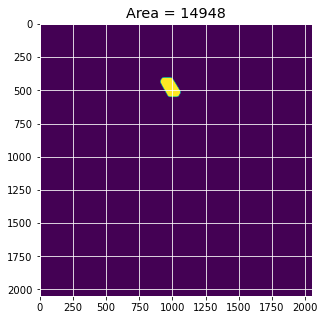

MicroStructure Number,  941
theta =  -38.26392453632476
l/b =  1.7491407992172003
time for  94  =  22.770484924316406
----------------------------------------------------------------------------
L1 6.595667839050293 secs
L2 1.3896291255950928 secs
L3 7.8577234745025635 secs
62.0


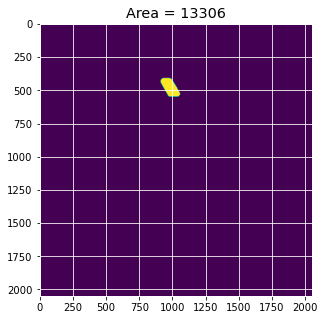

MicroStructure Number,  951
theta =  -38.23022684721175
l/b =  1.9368976661041437
time for  95  =  22.393823385238647
----------------------------------------------------------------------------
L1 6.268793106079102 secs
L2 1.3391613960266113 secs
L3 7.8126444816589355 secs
75.0


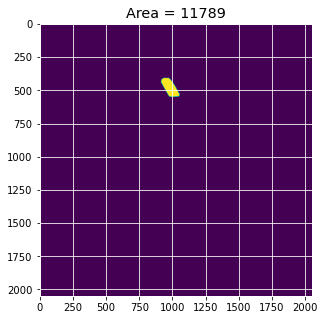

MicroStructure Number,  961
theta =  -36.12044705966131
l/b =  2.172269838955639
time for  96  =  22.02264165878296
----------------------------------------------------------------------------
L1 6.412661790847778 secs
L2 1.3610336780548096 secs
L3 7.8746116161346436 secs
115.0


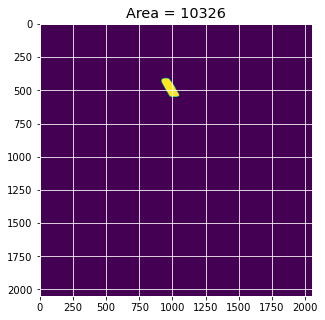

MicroStructure Number,  971
theta =  -35.30621823440482
l/b =  2.4556305633140174
time for  97  =  22.075973510742188
----------------------------------------------------------------------------
L1 6.294930696487427 secs
L2 1.3581886291503906 secs
L3 7.689709186553955 secs
183.0


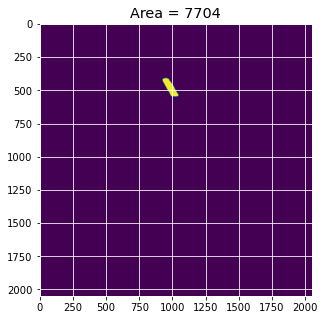

MicroStructure Number,  981
theta =  -33.04485708273534
l/b =  3.155415847043792
time for  98  =  21.819119930267334
----------------------------------------------------------------------------


In [25]:
# define cog here
area = []
cog1 = []
cog2 =[]
theta_array = []
l_array =[]
b_array = []
eig_array =[]
numberOfPpts = []
lbyb = []
for i in range(99):
    
    start = time.time()
    img_track1 = corr.dat_to_numpy(list_files[1+10*i])
    img_track1 = vel.gaussian_filter(img_track1,4)
    img_track1 = (img_track1>0.5)*1
    labels_track1 = hosh.hoshenKoplemanLabels(img_track1)
    numberOfPpts.append(np.max(labels_track1))
    aaa = referenceShape*labels_track1
    if np.sum(aaa)==0:
        print('the microstructure dissapeared, or moved very quickly')
        break
    label_for_our_ppt = np.median((aaa[aaa != 0]).flatten())
 
    print(label_for_our_ppt)
#     if(label_for_our_ppt==0):
#         print('the microstructure dissapeared, or moved very quickly')
#         break
        
    image_tracked1_binary = (labels_track1==label_for_our_ppt)*1
    referenceShape = image_tracked1_binary
    cog = hosh.precipitateCentres(image_tracked1_binary,1)
    theta, l, b, eig = hosh.findAngleMajorMinorEigenvector(image_tracked1_binary,1)
    aa = np.sum(image_tracked1_binary)
    
    area.append(aa)
    cog1.append(cog[0])
    cog2.append(cog[1])
    theta_array.append(theta)
    l_array.append(l)
    b_array.append(b)
    eig_array.append(eig)
    lbyb.append(l/b)
    
    
    plt.imshow(image_tracked1_binary)
    plt.title('Area = '+str(aa))
    plt.show()
    print('MicroStructure Number, ',1+10*i)
    print('theta = ',theta)
    print('l/b = ',l/b)
    print('time for ',i,' = ',time.time()-start)
    
    print('----------------------------------------------------------------------------')
    


In [26]:
area.reverse()
cog1.reverse()
cog2.reverse()
theta_array.reverse()
l_array.reverse()
b_array.reverse()
eig_array.reverse()
lbyb.reverse()

In [29]:
numberOfPpts.reverse()

In [31]:
df = pd.DataFrame()
df['area'] = area
df['cog1'] = cog1
df['cog2'] = cog2
df['theta_array'] =theta_array 
df['l_array'] = l_array
df['b_array'] = b_array
df['eig_array'] = eig_array
df['numberOfPpts'] = numberOfPpts
df['lbyb'] = lbyb
df.to_pickle('Everything_for_hexagonal_grain_C04.pkl')

In [2]:
df = pd.read_pickle('/home/sushil/Desktop/adithya/code/MicrostructureStatistics/HexagonalPlotData/Everything_for_hexagonal_grain_C04.pkl')

In [5]:
list(df.columns)

['area',
 'cog1',
 'cog2',
 'theta_array',
 'l_array',
 'b_array',
 'eig_array',
 'numberOfPpts',
 'lbyb']

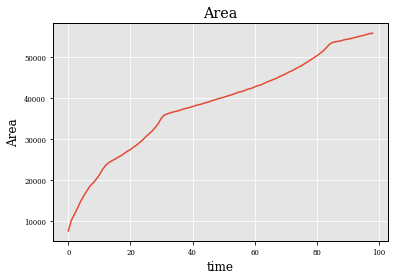

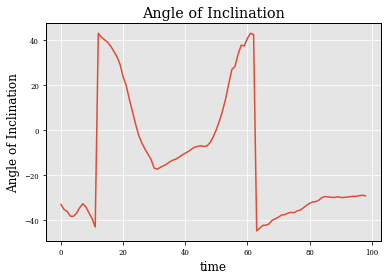

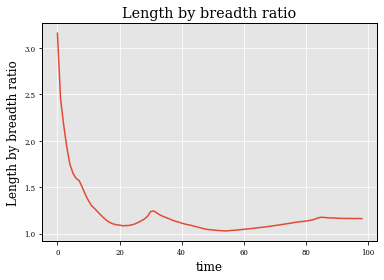

In [11]:
plt.plot(df.area)
plt.title('Area')
plt.ylabel('Area')
plt.xlabel('time')
plt.show()

plt.plot(df.theta_array)
plt.title('Angle of Inclination')
plt.ylabel('Angle of Inclination')
plt.xlabel('time')

plt.show()

plt.plot(df.lbyb)
plt.title('Length by breadth ratio')
plt.ylabel('Length by breadth ratio')
plt.xlabel('time')

plt.show()

